# K-Neares_Neighbor
Apa itu K-Neares_Neighbor(KKN)?
Apa itu K-Neares_Neighbor (KNN) adalah salah satu algoritma supervisef learning yang digunakan untuk klasifikasi dan regresi. Algoritma ini bekerja dengan cara:
  1. menghitung jarak antara data baru yang di ingin di prediksi dengan data data dalam dataset ( biasanya menggunakan jarak Eulideon )
  2. menentukan sejumlah K data terdekat ( K-nearest neighbors ) dari data baru tersebut
  3. untuk kalsifikasi algoritma akan memberikan label kelas berdasarkan mayoritas label dari tangga terdekat tersebut. untuk regresi nilai prediksi diambil dari rata rata nilai tangganya.

<function matplotlib.pyplot.show(close=None, block=None)>

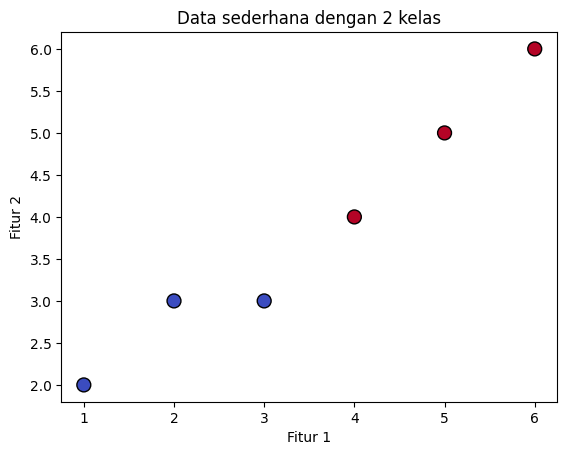

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

#data Sederhana
x = np.array ([[1,2],[2,3],[3,3],[4,4],[5,5],[6,6]]) # data point
y = np.array ([0,0,0,1,1,1]) #label class 0 dan 1

#visualisasi dataset
plt.scatter(x[:,0],x[:,1],c = y, cmap='coolwarm',s =100, edgecolor='k',label="Data Points")
plt.title('Data sederhana dengan 2 kelas')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show

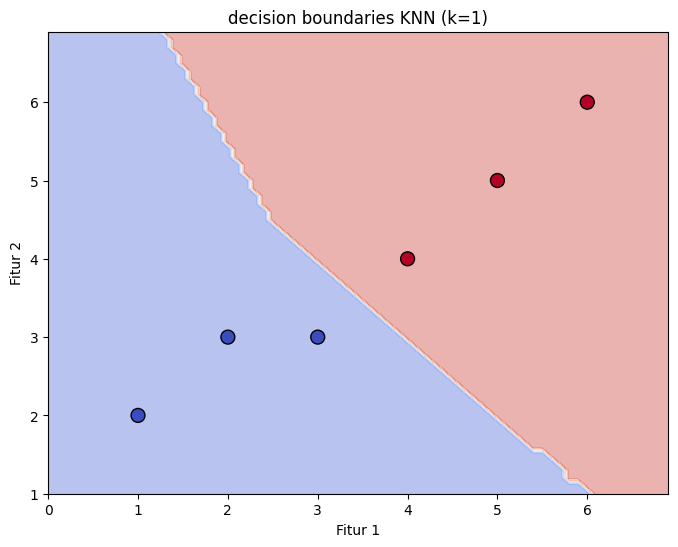

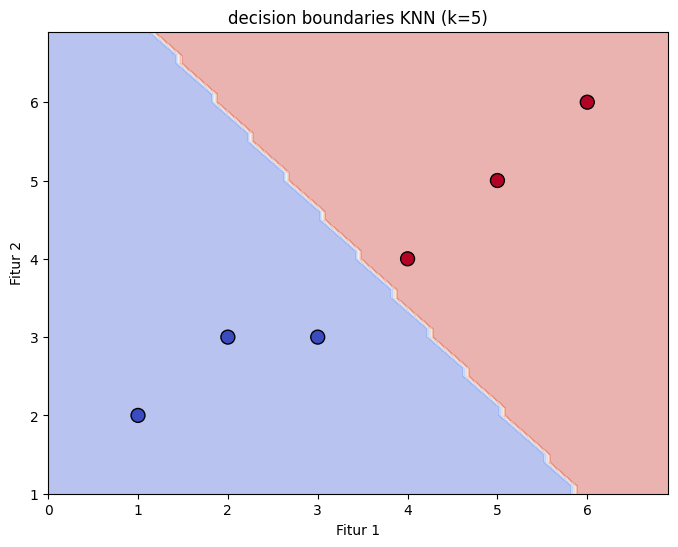

In [ ]:
def plot_batas_knn(k):
  #membuat Classifier KNN
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x,y)

  #buat grid untuk menampilkan batas keputusan (decision boundaries)
  x_min, x_max =x[:,0].min() - 1, x[:,0].max() + 1
  y_min, y_max =x[:,1].min() - 1, x[:,1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.1),
                       np.arange(y_min, y_max, 0.1))
  #prediksi kelas untuk setiap titik grid
  z = knn.predict(np.c_[xx.ravel(),yy.ravel()])  # mengubah array 2d jadi 1d, c_ untuk combine
  z = z.reshape(xx.shape)

  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, z, alpha=0.4, cmap='coolwarm')

  plt.scatter(x[:,0],x[:,1],c = y, cmap='coolwarm',s =100, edgecolor='k',label="Data Points")
  plt.title(f'decision boundaries KNN (k={k})')
  plt.xlabel('Fitur 1')
  plt.ylabel('Fitur 2')
  plt.show

#untuk k = 1
plot_batas_knn(1)

#untuk k = 1
plot_batas_knn(5)

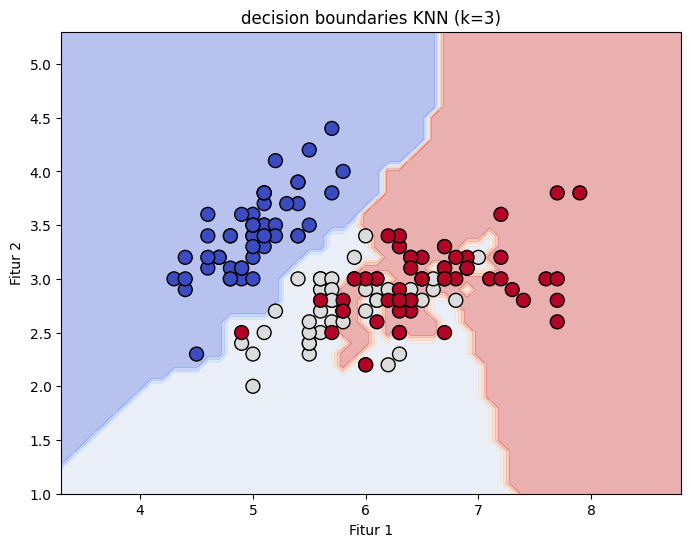

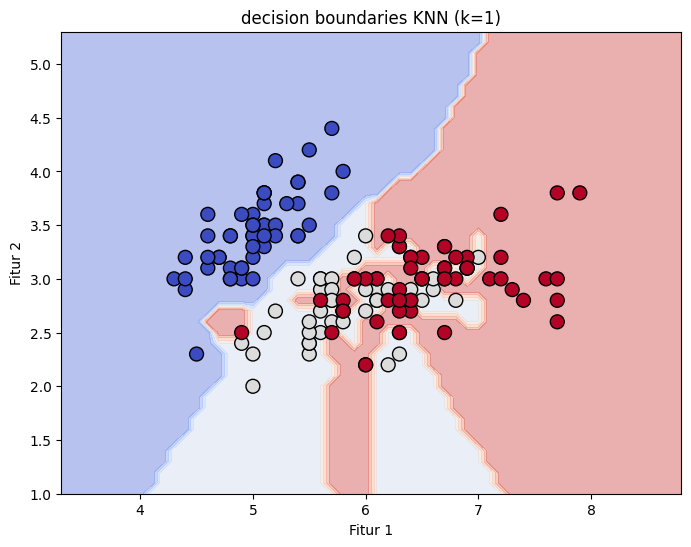

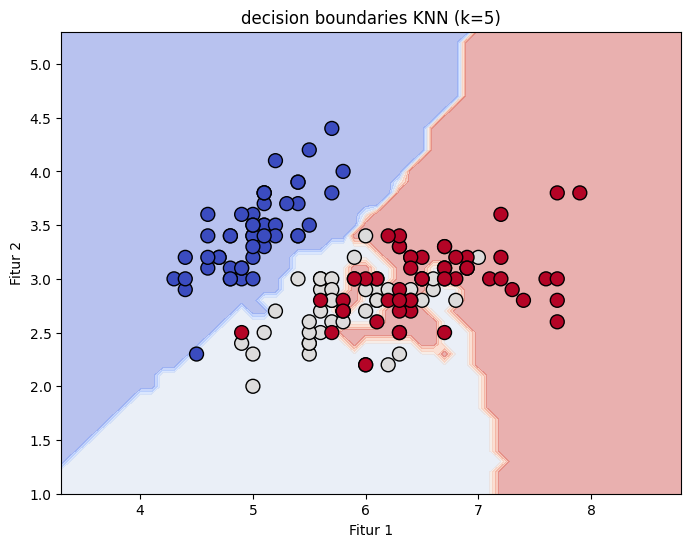

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x = iris.data[:,:2] # ambil 2 fitur saja, sepal lenght dan sepal width agar visualisasi 2d
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
knn = KNeighborsClassifier(n_neighbors=3)

#train model
knn.fit(x_train, y_train)

#buat prediksi
y_pred = knn.predict(x_test)

x_min, x_max =x[:,0].min() - 1, x[:,0].max() + 1
y_min, y_max =x[:,1].min() - 1, x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.1),
                       np.arange(y_min, y_max, 0.1))
#prediksi kelas untuk setiap titik grid
z = knn.predict(np.c_[xx.ravel(),yy.ravel()])  # mengubah array 2d jadi 1d, c_ untuk combine
z = z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, z, alpha=0.4, cmap='coolwarm')

plt.scatter(x[:,0],x[:,1],c = y, cmap='coolwarm',s =100, edgecolor='k',label="Data Points")
plt.title(f'decision boundaries KNN (k={3})')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show

#untuk k = 1
plot_batas_knn(1)

#untuk k = 1
plot_batas_knn(5)

# Generalization, Overfitting & Underfitting
*   Generalization yang Baik: Jika akurasi model pada data latih dan data uji cukup konsisten dan tidak terlalu berbeda, ini adalah indikator bahwa model mampu mengeneralisasi dengan baik
*   Overfitting: Jika akurasi data latih sangat tinggi (misalnya, >95%), tetapi akurasi data uji jauh lebih rendah (misalnya, <70%), ini adalah tanda bahwa model mengalami overfitting. Model “menghafal” data latih tetapi tidak mampu memprediksi dengan baik pada data baru.
*   Underfitting: Jika akurasi data latih dan data uji sama-sama rendah (misalnya, keduanya <60%), model mengalami underfitting, yang berarti model terlalu sederhana dan tidak mampu menangkap pola dalam data.



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x = iris.data[:,:2] #Ambil 2 fitur saja, yaitu sepal length dan sepal width, agar visualisasi 2D
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## GENERAZITION

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn_optimal = KNeighborsClassifier(n_neighbors=5)
knn_optimal.fit(x_train,y_train)
akurasi_optimal_train = accuracy_score(y_train, knn_optimal.predict(x_train)) # data dari training dan hasil prediksi
akurasi_optimal_test = accuracy_score(y_test, knn_optimal.predict(x_test)) # hasil training dan hasil prediksi
print(f"Good Generalization (k=5) - Training Accuracy: {akurasi_optimal_train * 100:.2f}%") # float 2 angka di belakang koma
print(f"Good Generalization (k=5) - Testing Accuracy: {akurasi_optimal_test * 100:.2f}%")

Good Generalization (k=5) - Training Accuracy: 81.67%
Good Generalization (k=5) - Testing Accuracy: 86.67%


# **overvitting**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn_overvitting = KNeighborsClassifier(n_neighbors=1)
knn_overvitting.fit(x_train,y_train)
akurasi_overvitting_train = accuracy_score(y_train, knn_overvitting.predict(x_train)) # data dari training dan hasil prediksi
akurasi_overvitting_test = accuracy_score(y_test, knn_overvitting.predict(x_test)) # hasil training dan hasil prediksi
print(f"Good Generalization (k=5) - Training Accuracy: {akurasi_overvitting_train * 100:.2f}%") # float 2 angka di belakang koma
print(f"Good Generalization (k=5) - Testing Accuracy: {akurasi_overvitting_test * 100:.2f}%")

Good Generalization (k=5) - Training Accuracy: 94.17%
Good Generalization (k=5) - Testing Accuracy: 66.67%


# Underfitting

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn_optimal = KNeighborsClassifier(n_neighbors=50)
knn_optimal.fit(x_train,y_train)
akurasi_optimal_train = accuracy_score(y_train, knn_optimal.predict(x_train)) # data dari training dan hasil prediksi
akurasi_optimal_test = accuracy_score(y_test, knn_optimal.predict(x_test)) # hasil training dan hasil prediksi
print(f"Good Generalization (k=5) - Training Accuracy: {akurasi_optimal_train * 100:.2f}%") # float 2 angka di belakang koma
print(f"Good Generalization (k=5) - Testing Accuracy: {akurasi_optimal_test * 100:.2f}%")

Good Generalization (k=5) - Training Accuracy: 77.50%
Good Generalization (k=5) - Testing Accuracy: 73.33%


# **Tugas**
Gunakan data Sklearn untuk Breast Cancer menggunakan KNN Classifier (ambil 2 fitur pertama saja), gunakan n_neighbors dengan mengambil jumlah 2 angka dari belakang di NIM mahasiswa masing-masing (Misal I.2211195, maka n_neighbors=95)
Buat visualisasi decision boundaries dan sebutkan apakah hasil akurasinya good generalization, overfitting, atau underfitting

NAMA : MUHAMAD ELGAR<br>
NIM  : I.2210197

<function matplotlib.pyplot.show(close=None, block=None)>

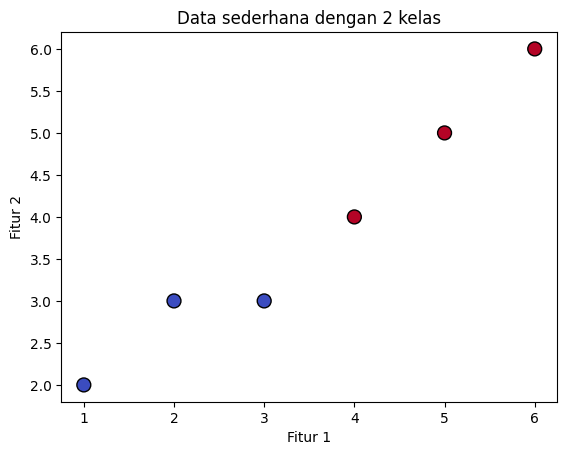

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

#data Sederhana
x = np.array ([[1,2],[2,3],[3,3],[4,4],[5,5],[6,6]]) # data point
y = np.array ([0,0,0,1,1,1]) #label class 0 dan 1

#visualisasi dataset
plt.scatter(x[:,0],x[:,1],c = y, cmap='coolwarm',s =100, edgecolor='k',label="Data Points")
plt.title('Data sederhana dengan 2 kelas')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show

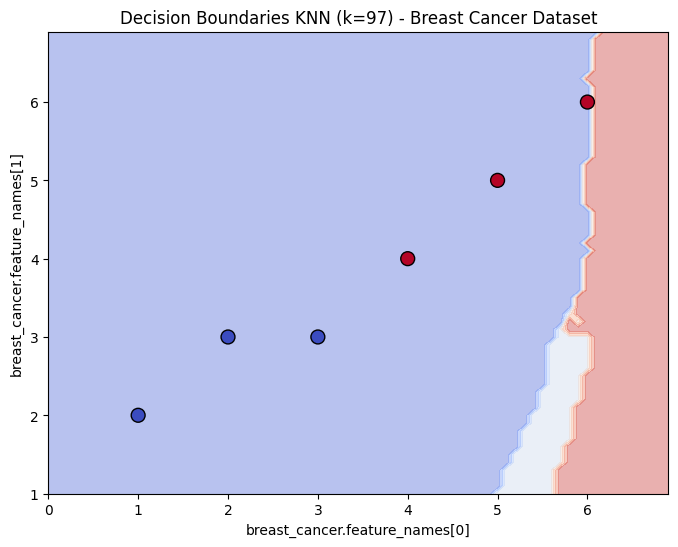

In [ ]:
# Define a function for plotting decision boundaries with different values of k
def plot_decision_boundary_k(k):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)

    # Create mesh grid
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict class for each point in the mesh grid
    z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    # Plotting decision boundaries
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, z, alpha=0.4, cmap='coolwarm')

    # Plot data points
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', s=100, edgecolor='k', label="Data Points")
    plt.title(f'Decision Boundaries KNN (k={k}) - Breast Cancer Dataset')
    plt.xlabel('breast_cancer.feature_names[0]')
    plt.ylabel('breast_cancer.feature_names[1]')
    plt.show()

# Plot for k = 97
plot_decision_boundary_k(97)


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

cancer = load_breast_cancer()
x = cancer.data[:,:2] #Ambil 2 fitur saja, yaitu sepal length dan sepal width, agar visualisasi 2D
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## GENERAZITION

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn_optimal = KNeighborsClassifier(n_neighbors=97)
knn_optimal.fit(x_train,y_train)
akurasi_optimal_train = accuracy_score(y_train, knn_optimal.predict(x_train)) # data dari training dan hasil prediksi
akurasi_optimal_test = accuracy_score(y_test, knn_optimal.predict(x_test)) # hasil training dan hasil prediksi
print(f"Good Generalization (k=5) - Training Accuracy: {akurasi_optimal_train * 100:.2f}%") # float 2 angka di belakang koma
print(f"Good Generalization (k=5) - Testing Accuracy: {akurasi_optimal_test * 100:.2f}%")

Good Generalization (k=5) - Training Accuracy: 89.67%
Good Generalization (k=5) - Testing Accuracy: 83.33%


# **overvitting**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn_overvitting = KNeighborsClassifier(n_neighbors=97)
knn_overvitting.fit(x_train,y_train)
akurasi_overvitting_train = accuracy_score(y_train, knn_overvitting.predict(x_train)) # data dari training dan hasil prediksi
akurasi_overvitting_test = accuracy_score(y_test, knn_overvitting.predict(x_test)) # hasil training dan hasil prediksi
print(f"overvitting (k=5) - Training Accuracy: {akurasi_overvitting_train * 100:.2f}%") # float 2 angka di belakang koma
print(f"overvitting (k=5) - Testing Accuracy: {akurasi_overvitting_test * 100:.2f}%")

overvitting (k=5) - Training Accuracy: 89.67%
overvitting (k=5) - Testing Accuracy: 83.33%


# **Underfitting**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn_optimal = KNeighborsClassifier(n_neighbors=97)
knn_optimal.fit(x_train,y_train)
akurasi_optimal_train = accuracy_score(y_train, knn_optimal.predict(x_train)) # data dari training dan hasil prediksi
akurasi_optimal_test = accuracy_score(y_test, knn_optimal.predict(x_test)) # hasil training dan hasil prediksi
print(f"Underfitting (k=5) - Training Accuracy: {akurasi_optimal_train * 100:.2f}%") # float 2 angka di belakang koma
print(f"Underfitting (k=5) - Testing Accuracy: {akurasi_optimal_test * 100:.2f}%")

Underfitting (k=5) - Training Accuracy: 89.67%
Underfitting (k=5) - Testing Accuracy: 83.33%
